In [1]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## 확률론적 선형회귀 모형

확률론적 선형회귀 모형이란 데이터가 확률 변수로부터 생성된 표본으로 가정한다.

### 1) 선형 정규 분포 가정

종속변수 $y$가 독립변수 **$x$와의 선형조합으로 결정되는 기댓값과 고정된 분산 $\sigma^2$**을 가지는 **가우시안 정규분포**를 따른다고 가정한다.

$$y \sim \mathcal{N}(w^Tx, \sigma^2)$$

잡음(disturbance) $\epsilon$ 은 다음과 같다.

$$\epsilon = y - w^Tx$$

**위 식에서 $w^Tx$는 회귀식의 중심위치를 의미한다. 즉, 정확한 회귀식을 따르는 중심위치에서 잡음으로 인해 $y$는 회귀선에서 잡음만큼 떨어진 위치에 존재하게 된다.**

이를 이용해 $y$의 확률밀도 함수는 다음과 같이 쓸 수 있다.

$$p(\epsilon|\theta) = \mathcal{N}(0, \sigma^2)$$

> 이 가정의 핵심은 $y$는 $x$때문에 기댓값이 바뀌는 정규분포를 따르는 확률변수에서 나온 값이라는 것이다.

> $\epsilon$은 0을 중심으로하는 정규분포를 따르게 되며 $x, y$ 그 어느 것도 그 자체로 정규분포일 필요는 없다. $y$는 $x$에 대해 조건부로 정규분포를 이루는 것이다.

### 2) 외생성(Exogeneity) 가정

잡음 $\epsilon$의 기댓값은 독립변수 $x$에 상관없이 항상 0이라고 가정한다.

**기댓값 반복의 법칙**을 이용하면 다음과 같다.

$$E[\epsilon] = E[E[\epsilon|x]] = 0$$

>즉, 잡음의 기댓값음 독립변수에 상관없이 항상 0이라고 가정하며 기댓값 반복의 법칙을 이용해 잡음 자체의 기댓값 또한 0임을 알 수 있다.

### 3) 조건부 독립 가정

$i$번째 표본의 잡음 $\epsilon_i$와 $j$번째 표본의 잡음 $\epsilon_j$의 공분산 값이 $x$와 상관없이 항상 0이라고 가정한다.

$$Cov[\epsilon_i, \epsilon_j|x]=0$$

공분산이 0이라는 것은 두 잡음이 서로 독립이라는 가정으로 볼 수 있다.

### 4) 등분산성 가정

$i$번째 표본의 잡음과 $j$번째 표본의 잡음의 분산값이 표본과 상관없이 항상 같다고 가정한다.

이는 잡음벡터 $\epsilon$의 공분산 행렬이 항등행렬 형태가 되어야 한다는 조건으로 볼 수 있다.

$$Cov[\epsilon] = E[\epsilon\epsilon^T] = \sigma^2I$$

## Maximum Likelihood Estimation을 사용한 선형 회귀분석

최대 가능도 방법을 이용해 확률론적 선형회귀모형의 가중치 벡터 $w$를 구하면 다음과 같다.

\begin{split}
\begin{eqnarray}
p(y_{1:N} \,\big|\, x_{1:N}, \theta)
&=& \prod_{i=1}^N \mathcal{N}(y_i \,\big|\, w^T x_i , \sigma^2) \\
&=& \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y_i-w^T x_i)^2}{2\sigma^2} \right\}  \\
\end{eqnarray}
\end{split}

위 가능도 수식의 계산을 쉽게 하기 위해 Log를 적용하면 product가 summation으로 바뀌게 된다.

\begin{split}
\begin{eqnarray}
\text{LL}  
&=& \log p(y_{1:N} \,\big|\, x_{1:N}, \theta) \\
&=& \log \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(y_i-w^T x_i)^2}{2\sigma^2} \right\}  \\
&=& -\dfrac{1}{2\sigma^2} \sum_{i=1}^N (y_i-w^T x_i)^2 - \dfrac{N}{2} \log{2\pi}{\sigma^2}  \\
\end{eqnarray}
\end{split}

최종적으로 Log를 취한 Likelihood는 앞뒤로 어떤 상수가 곱해진 $y_i - w^Tx_i$의 제곱합이 된다.

이 상수들을 각각 $C_0, C_1$으로 표현하면 다음과 같다.

$$\text{LL}  =  -C_1 (y - Xw)^T(y-Xw) - C_0 = -C_1(w^TX^TXw -2 y^TXw + y^Ty) - C_0$$

$$C_1 =  -\dfrac{1}{2\sigma^2}$$

$$C_0 =  \dfrac{N}{2} \log{2\pi}{\sigma^2}$$

위 결과를 최적화 하기 위해 $w$로 미분하면 다음과 같다.

$$\dfrac{d}{dw} \text{LL} = -C_1 \left( 2X^TX \hat{w} - 2X^Ty \right) = 0$$

$$\hat{w} = (X^TX)^{-1}X^T y$$

최종적으로 추정한 $\hat{w}$는 OLS로 구한 결과와 동일한 것을 확인할 수 있다.

## 잔차의 분포

확률론적 선형회귀 모형을 이용하면 회귀분석시 생기는 **잔차가 정규분포를 따른다**는 것을 증명할 수 있다.

선형회귀 분석을 통해 구하는 예측값 $\hat{y}$은 다음과 같이 계산된다.

$$\hat{y}=X\hat{w}=X(X^TX)^{-1}X^Ty=Hy$$

$y$의 앞부분을 $H$로 표현하는데 이 $H$는 투영행렬이라고 한다.

투영행렬을 이용해 잔차를 다음과 같이 표현할 수 있다.

$$e = y - \hat{y} = y - Hy = (I-H)y = My$$

이 행렬 $M$은 잔차행렬이라고 한다.

위의 정리를 이용해 $e$를 표현하면 다음과 같다.

$$e = My = M(Xw + \epsilon) = MXw + M\epsilon$$

그런데 여기서 $MX = 0$이 된다는 성질이 있기 때문에 최종적으로 $e = M\epsilon$이 된다.

즉, 잡음$\epsilon$에 대해 어떤 행렬$M$(잔차행렬)을 곱하여 선형조합하면 $e$라는 잔차벡터가 된다.

그런데 정규분포를 선형조합하면 그 결과도 정규분포를 따른다는 성질이 있다.

> 따라서 정규분포를 따르는 잡음을 선형조합한 결과인 잔차 또한 정규분포를 따른다고 할 수 있다.

In [6]:
import scipy as sp
import scipy.stats

In [5]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(
    n_samples = 100, n_features = 1, noise = 20, coef=True
)
dfX0 = pd.DataFrame(X0, columns=['X1'])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=['y'])

model = sm.OLS(dfy, dfX)
result = model.fit()

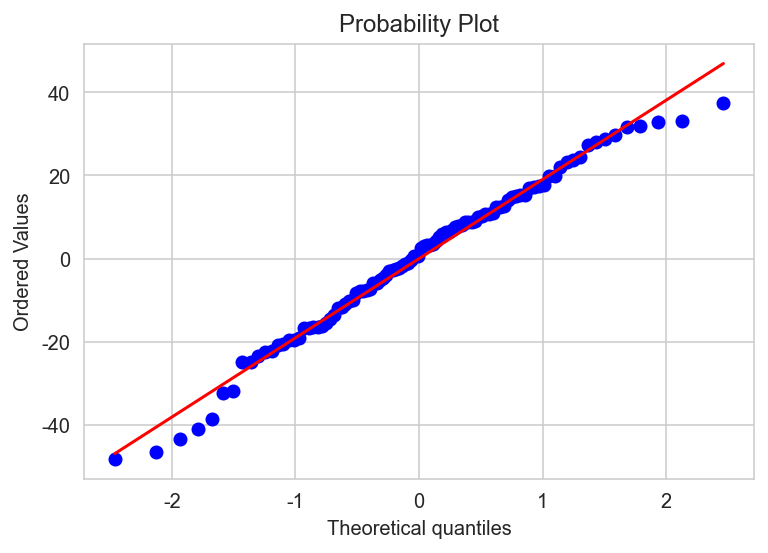

In [7]:
sp.stats.probplot(result.resid, plot=plt)
plt.show()

실제로 회귀분석용 데이터의 resid(잔차)를 이용해 Q-Q 플롯을 그린 결과 정규분포를 따르는 것을 확인할 수 있다.

추가적으로 옴니버스, 자크베라 정규성 검정을 통해 유의확률을 확인한 결과 정규분포를 따른다는 귀무가설을 채택할만한 유의확률이 도출된 것을 확인할 수 있다.

In [9]:
test = sm.stats.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  2.180
P-value     :  0.336


In [10]:
test = sm.stats.jarque_bera(result.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test):
    print("%-12s: %6.3f" % xi)

Jarque-Bera :  2.157
P-value     :  0.340
Skew        : -0.346
Kurtosis    :  2.802


또한 오차의 기댓값이 $x$와 상관없이 0이므로 잔차의 기댓값 또한 $x$와 상관없이 0이어야한다.

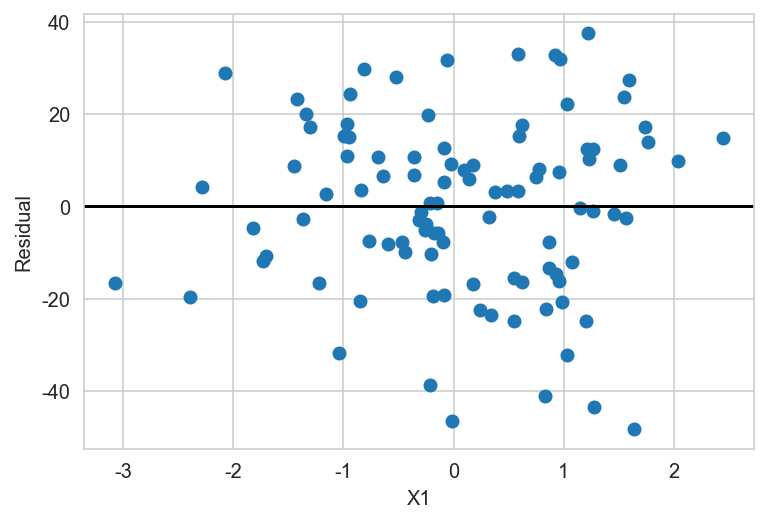

In [11]:
plt.plot(X0, result.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

실제로 $x$값이 달라짐에 따라 잔차의 분포가 어떻게 달라지는지를 시각화 한 결과 데이터의 분포 형태가 어떤 관계가 있다고 보기 어려운 것을 확인할 수 있다.

plot_regress_exog() 명령으로 그려지는 1행 2열의 시각화 결과가 바로 위의 시각화 결과이다.

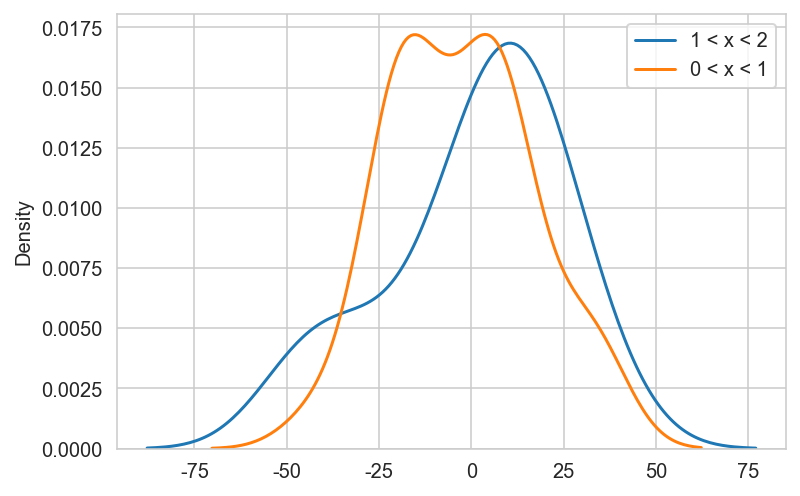

In [12]:
sns.kdeplot(result.resid[((1 < X0) & (X0 < 2)).flatten()], label="1 < x < 2")
sns.kdeplot(result.resid[((0 < X0) & (X0 < 1)).flatten()], label="0 < x < 1")
plt.legend()
plt.show()

실제로 $0<x<1$, $1<x<2$ 의 두 구간에 대해 $e$의 분포를 확인한 결과 둘다 기댓값이 0에 가까운 것을 확인할 수 있다.

## 회귀계수의 표준오차

가중치의 예측치 $\hat{w}$는 정규분포 확률변수인 $\epsilon$(disturbance)의 선형변환이므로 정규분포를 따른다.

\begin{split}  
\begin{eqnarray}
\hat{w} 
&=& (X^TX)^{-1} X^T y \\
&=& (X^TX)^{-1} X^T (X w + \epsilon) \\
&=& w + (X^TX)^{-1} X^T \epsilon \\
\end{eqnarray}
\end{split}

$\hat{w}$의 기댓값은 $w$이므로 $w$에 대한 비편향 추정값(unbiased estimate)이다.

\begin{split}  
\begin{eqnarray}
\text{E}[\hat{w}] 
&=&  \text{E}[ w + (X^TX)^{-1} X^T \epsilon ] \\
&=&  w + (X^TX)^{-1} X^T \text{E}[ \epsilon ] \\
&=& w
\end{eqnarray}
\end{split}

$\hat{w}$의 공분산은 다음과 같다.

\begin{split}
\begin{eqnarray}
\text{Cov}[\hat{w}] 
&=& E[(\hat{w} - w)(\hat{w} - w)^T] \\
&=& E[((X^TX)^{-1} X^T \epsilon)((X^TX)^{-1} X^T \epsilon)^T] \\
&=& E[(X^TX)^{-1} X^T \epsilon \epsilon^T X(X^TX)^{−1} ] \\
&=& (X^TX)^{-1} X^T E[\epsilon \epsilon^T] X(X^TX)^{−1} \\
&=& (X^TX)^{-1} X^T (\sigma^2 I) X(X^TX)^{−1} \\
&=& \sigma^2  (X^TX)^{-1}
\end{eqnarray}
\end{split}

그런데 $\sigma$(잡음의 분산)는 알 수 없는 값으로 이를 잔차의 분산으로 추정한다.

\begin{split}
\begin{eqnarray}
\text{E}[e^2] 
&=& \text{E}[(M\epsilon)^2] \\
&=& \text{E}[(\epsilon^T M^T)(M\epsilon)] \\
&=& \text{E}[ \epsilon^T M \epsilon] \\
&=& \text{E}[ \text{tr}(\epsilon^T M \epsilon) ] \\
&=& \text{tr}( \text{E}[ M \epsilon \epsilon^T ]) \\
&=& \text{tr}( M \text{E}[\epsilon \epsilon^T ]) \\
&=& \text{tr}( M \sigma^2 I ) \\
&=& \sigma^2 \text{tr}(M) \\
&=& \sigma^2 \text{tr}(I - X(X^TX)^{-1}X^T) \\
&=& \sigma^2 \left( \text{tr}(I) - \text{tr}((X^TX)^{-1}(X^TX))  \right) \\
&=& \sigma^2 (N-K) \\
\end{eqnarray}
\end{split}

- $K$ : $X$행렬의 수
- $D$ : 입력 차원의 수
- 1 : 상수항

$$K = D + 1$$

잡음에 대한 비편향 표본분산은 $N-K$만큼 작아지는 값이 된다.

$$s^2 = \dfrac{e^Te}{N-K} = \dfrac{RSS}{N-K}$$

실제 가중치와 추정한 가중치의 차이를 표준오차로 나눈 값은 자유도가 N-K인 스튜던트 t분포를 따른다.

$$\dfrac{\hat{w}_i - w_i}{se_i} \sim t_{N-K} \;\; (i=0, \ldots, K-1)$$